### Import Required Libraries 

In [282]:
import pandas as pd
import numpy as np
import random as rnd

In [346]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [284]:
df = pd.read_csv('final_train.csv')

In [285]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')

In [286]:
X = df.drop(columns=['Survived'])
y = df.Survived

In [287]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,22.0,1,0,7.2500,1,Mr
1,1,0,38.0,1,0,71.2833,0,Mrs
2,3,0,26.0,0,0,7.9250,1,Miss
3,1,0,35.0,1,0,53.1000,1,Mrs
4,3,1,35.0,0,0,8.0500,1,Mr


### Encode categorical variables 

In [288]:
X = pd.get_dummies(X)

In [289]:
X.shape

(891, 21)

### Scale features

In [290]:
from sklearn.preprocessing import scale

In [291]:
X['Age'] = scale(X['Age'])
X['Fare'] = scale(X['Fare'])

### Split train and test data

In [292]:
from sklearn.model_selection import train_test_split 

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [294]:
models = pd.DataFrame(columns = ['Classifier','Train','Test'])

## LogisticRegression

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [296]:
lr = LogisticRegression().fit(X_train,y_train)
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [297]:
train_score = lr.score(X_train,y_train)
train_score

0.8342696629213483

In [298]:
y_pred = lr.predict(X_test)

In [299]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[92, 18],
       [16, 53]], dtype=int64)

In [300]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.8100558659217877

In [301]:
models = models.append( {'Classifier': 'LogisticRegression','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## GradientBoostingClassifier

In [302]:
from sklearn.ensemble import GradientBoostingClassifier

In [303]:
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [304]:
train_score = gbc.score(X_train,y_train)
train_score

0.9030898876404494

In [305]:
y_pred = gbc.predict(X_test)

In [306]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  10],
       [ 20,  49]], dtype=int64)

In [307]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.8324022346368715

In [308]:
models = models.append( {'Classifier': 'GradientBoosting','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## DecisionTreeClassifier

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [310]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [311]:
train_score = model.score(X_train,y_train)
train_score

0.9831460674157303

In [312]:
y_pred = model.predict(X_test)

In [313]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.7597765363128491

In [314]:
confusion_matrix(y_test, y_pred)

array([[88, 22],
       [21, 48]], dtype=int64)

In [315]:
models = models.append( {'Classifier': 'DecisonTree','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## RandomForestClassifier

In [316]:
from sklearn.ensemble import RandomForestClassifier

In [317]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [318]:
train_score = model.score(X_train,y_train)
train_score

0.9831460674157303

In [319]:
y_pred = model.predict(X_test)

In [320]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.8212290502793296

In [321]:
confusion_matrix(y_test, y_pred)

array([[96, 14],
       [18, 51]], dtype=int64)

In [322]:
models = models.append( {'Classifier': 'RandomForest','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## KNN 

In [323]:
from sklearn.neighbors import KNeighborsClassifier

In [324]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [325]:
train_score = model.score(X_train,y_train)
train_score

0.8764044943820225

In [326]:
y_pred = model.predict(X_test)

In [327]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.8324022346368715

In [328]:
confusion_matrix(y_test, y_pred)

array([[98, 12],
       [18, 51]], dtype=int64)

In [329]:
models = models.append( {'Classifier': 'KNN','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## SVM

In [330]:
from sklearn.svm import SVC

In [331]:
model = SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [332]:
train_score = model.score(X_train,y_train)
train_score

0.8412921348314607

In [333]:
y_pred = model.predict(X_test)

In [334]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.8156424581005587

In [335]:
confusion_matrix(y_test, y_pred)

array([[96, 14],
       [19, 50]], dtype=int64)

In [336]:
models = models.append( {'Classifier': 'SVM','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## NaiveBayes

In [337]:
from sklearn.naive_bayes import GaussianNB

In [338]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [339]:
train_score = model.score(X_train,y_train)
train_score

0.6418539325842697

In [340]:
y_pred = model.predict(X_test)

In [341]:
test_score = accuracy_score(y_test,y_pred)
test_score

0.6480446927374302

In [342]:
confusion_matrix(y_test, y_pred)

array([[109,   1],
       [ 62,   7]], dtype=int64)

In [343]:
models = models.append( {'Classifier': 'NaiveBayes','Train' : train_score, 'Test' : test_score}, ignore_index=True)

## Draw Bar plot showing performance of all models

In [344]:
models

,Classifier,Train,Test
0,LogisticRegression,0.834270,0.810056
1,GradientBoosting,0.903090,0.832402
2,DecisonTree,0.983146,0.759777
3,RandomForest,0.983146,0.821229
4,KNN,0.876404,0.832402
5,SVM,0.841292,0.815642
6,NaiveBayes,0.641854,0.648045


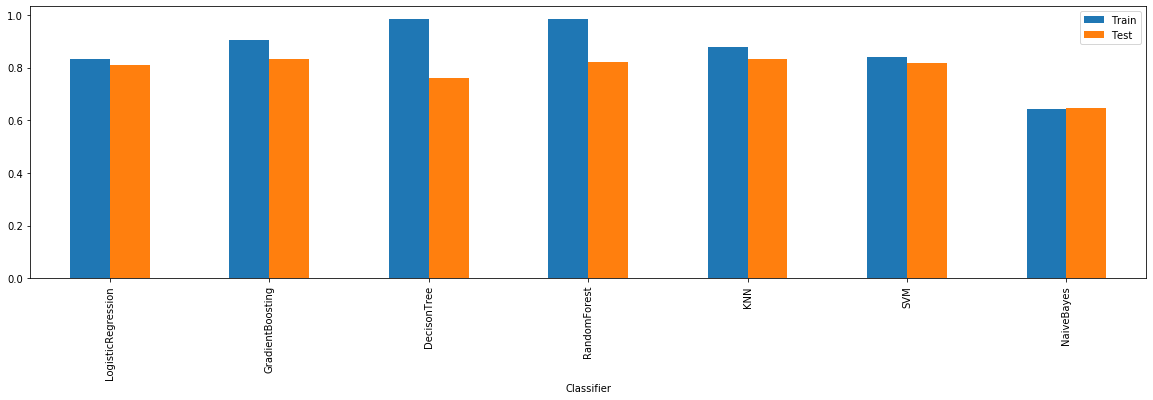

In [345]:
models.plot.bar(x='Classifier', figsize=(20,5))